## Analyze A/B Test Results

## Project: Analyse the probability of users converting to a new page or keep using the old   page

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, we will be working to understand the results of an A/B test run by an e-commerce website.  Our goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df['user_id'].count()

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df[df['converted'] == 1].count()['converted'] / df['user_id'].count()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df.query("group == 'treatment' & landing_page != 'new_page'").count()['user_id'] + df.query("group != 'treatment' & landing_page == 'new_page'").count()['user_id']

3893

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [8]:
df['user_id'].nunique()

290584

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df2_part1 = df.query("group == 'treatment' & landing_page == 'new_page'")
df2_part2 = df.query("group == 'control' & landing_page == 'old_page'")
df2 = df2_part1.append(df2_part2)
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2['user_id'].duplicated() == True]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
#Let us name the row we would like to delete and then use it's index to drop it
df2_drop = df2[df2['user_id'].duplicated() == True]
df2 = df2.drop(df2_drop.index)

In [15]:
#Verify the row has been dropped
df2[df2['user_id'].duplicated() == True].count()['user_id']

0

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
# let's define some variables: n for total users and nc those who converted
#P will be the probability of an individual converting regardless of the page they receive
nc = df2.query("converted == 1").count()['user_id']
n = df2['user_id'].count()
P_co = nc/n
P_co

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
#Number of user in control group:
n_ctr = df2.query("group == 'control'").count()['user_id']
#Number of user in control group who converted:
n_ctr_conv = df2.query("group == 'control' & converted == 1").count()['user_id']
#Probability they converted:
p_ctr_conv = n_ctr_conv/n_ctr
p_ctr_conv

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
#Number of user in treatment group:
n_tre = df2.query("group == 'treatment'").count()['user_id']
#Number of user in treatment group who converted:
n_tre_conv = df2.query("group == 'treatment' & converted == 1").count()['user_id']
#Probability they converted:
p_tre_conv = n_tre_conv/n_tre
p_tre_conv

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
#Number of user who received a new page is the number of people in the treatment group.
p_tre = n_tre/n
p_tre

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Earlier, we found that the probability to be converted was 0.1196. However, the probability for treatment group to be converted is 0.1188 and the probalibity for control group to be converted is even bigger 0.1204. 
Therefore, we cannot simply rely on those informations to determine whether the new treatment page leads to more conversions. We need to determine out of those converted, how many people actually came from a treatment group, and how many people came from a control group. Then, we will be able to conclude which group leads to more conversions.**

In [20]:
#Probability of being from treatment group, given the user is converted(posterior probability)
p_tre_conv = (p_tre*p_tre_conv)/P_co
p_tre_conv

0.49676286939257047

In [21]:
#Probability of being from control group, given the user is converted(posterior probability)
p_cont_conv = ((1-p_tre)*p_ctr_conv)/P_co
p_cont_conv

0.50323713060742969

**Although the probability to receive a new page is 0.5001, the probability of actually being converted is smaller in this group. As a consequence the number of people converted in the control group is higher than the one in the treatment group. As an illustration, the posterior probability for those converted of being from the control group is higher. We can easily conclude that the control group leads to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

>**$H{0}$**: the old page is better or **$p_{old}$** >= **$p_{new}$**

>**$H{1}$**: the new page is better or **$p_{old}$** < **$p_{new}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [22]:
p_new = P_co
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [23]:
p_old = P_co
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [24]:
n_new = n_tre
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [25]:
n_old = n_ctr
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted.mean()

0.11982657766155116

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted.mean()

0.11979431969932679

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
p_new - p_old

0.0

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [29]:
p_diffs = []
new_page_converted = np.random.binomial(n_new,p_new,10000)/n_new
old_page_converted = np.random.binomial(n_old,p_old,10000)/n_old
p_diffs = new_page_converted - old_page_converted 
p_diffs

array([-0.00072486,  0.00047956, -0.00029838, ..., -0.00135111,
       -0.00139263,  0.00029381])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

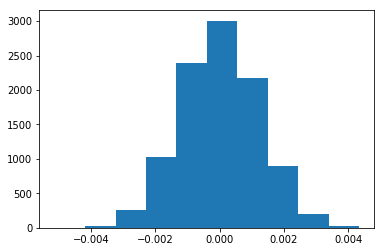

In [30]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
obs_diff = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()
p_diffs = np.array(p_diffs)
(p_diffs > obs_diff).mean()

0.90590000000000004

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**What we just computed in part J  is called the  *p-value*. It represents the probability of observing our data or something more extreme in favor of the alternative given the null hypothesis is true.**

**If the value is *bigger than 0.05*, then we fail to reject the null hypothesis. in this case, this will mean that we do not have enough evidence to conclude that the new page is better than the old page. In other terms, we will assume that the olg page is better or similar to the new one.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page' & converted == 1").count()['user_id']
convert_new = df2.query("landing_page == 'new_page' & converted == 1").count()['user_id']
n_old = df2.query("landing_page == 'old_page'").count()['user_id']
n_new = df2.query("landing_page == 'new_page'").count()['user_id']

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [33]:
from statsmodels.stats.proportion import proportions_ztest
count = np.array([convert_old, convert_new])
nobs = np.array([n_old, n_new])
stat, pval = proportions_ztest(count, nobs, alternative='smaller')
print('{0:0.3f}'.format(pval))
print('{0:0.3f}'.format(stat))

0.905
1.311


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The z-score is *1.311*. According to the document in this link(https://www.statisticshowto.com/z-test/), The z-score associated with a 5% alpha level / 2 is 1.96.**

**In this example, we have 1.311 < 1.96. Therefore, we fail to reject the null hypothesis. This decision agrees with the findings in parts j. and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
df2['intercept'] = 1
df2['ab_page'] = (df2.group == 'treatment').astype(int)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [35]:
Logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result = Logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-05-03 20:48 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p_value associated with ab_page is *0.1899*. It's different from the value found in Part II because there we calculated the p-value for values bigger than the mean (H1:p_diff > 0). This was differences only for values on the right hand side of the distribution. That estimation correspond to a one_tailed test.**

**In this section, the p-value is calculated base on a two tailed test: H1: p_diff <> 0. The p-value is calculated for both sides of the distribution. When I calculated my z-score in Part two based on a two-tailed test, I got the same p-value *0.19*.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It is important to consider other factors to add to the regression model because this will give a more accurate result, or a result more close to reality. However, there is a disadvantage to adding additional terms into the regression model. All factors become inportant and a factor with small impact in reality might have a big influence on the result of the model**.

In [37]:
# Let's analyse the time column to see if there is an influence of this variable on the conversion. We will extract the date
#and analyse the correlation with conversion.
df3 = df2

In [38]:
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


In [39]:
#Creating columns from timestamp
df3['timestamp'] = pd.to_datetime(df3['timestamp'] )
df3['date'] = df3['timestamp'].dt.date
df3['year'] = df3['timestamp'].dt.year
df3['month'] = df3['timestamp'].dt.month
df3['day'] = df3['timestamp'].dt.day
df3['hour'] = df3['timestamp'].dt.hour
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,date,year,month,day,hour
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,2017-01-11,2017,1,11,16
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,2017-01-08,2017,1,8,18
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,2017-01-19,2017,1,19,3
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,2017-01-04,2017,1,4,17
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,2017-01-15,2017,1,15,18


In [40]:
#Viewing different values per column
print(list(set(df3['year'])))
print(list(set(df3['month'])))
print(list(set(df3['day'])))
print(list(set(df3['hour'])))

[2017]
[1]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


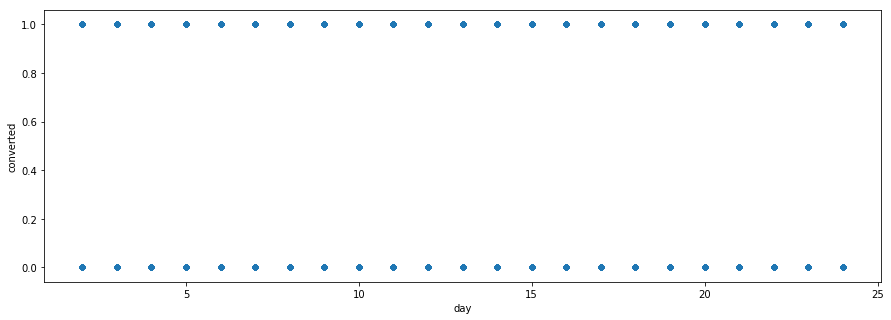

In [41]:
#From the previous result, we can conclude that the experiment was made in January 2017. Therefore, we will only focus on day
#and hour. Let's start with day
df3.plot(x='day', y='converted', kind='scatter', figsize=(15, 5))

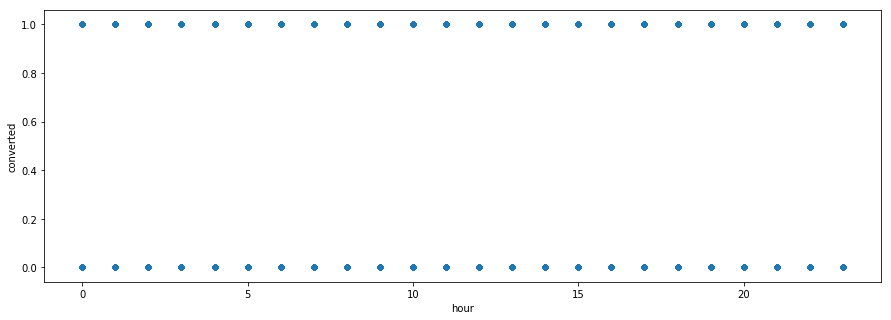

In [42]:
#According to the plot we just did, there is no corelation between the day and the . Now, the hour:
df3.plot(x='hour', y='converted', kind='scatter', figsize=(15, 5))

>Despite the fact that the scatter plot does not indicate a correlation betwee those variables, we will try to fit a model and
see what we have as p-value

In [43]:
Log_mod = sm.Logit(df3['converted'], df2[['intercept', 'day', 'hour']])
res = Log_mod.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.366105
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-05-03 20:49 AIC:              212774.2559
No. Observations:   290584           BIC:              212805.9949
Df Model:           2                Log-Likelihood:   -1.0638e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -2.0421    0.0167  -122.2429  0.0000  -2.0748  -2.0093
day           0.0015    0.0009     1.6385  0.1013  -0.0003   0.0032
hour          0.0023    0.0008     2.7720  0.0056   0.0007   0.0039
==================================================================

"""

>For day, the p-value is high, bigger than 0.05, but for hourthe p-value is small. We would be tempted to say that the hour has an impact of weither the user will convert or not. However, given the fact that the experiment was done in 3 different countries, with different time zones, we would not rely on this variable. We do not know how the time was recorded. As a result, we wont use those value as an evidence to reject the Null Hypothesis.

>It does not seem to be any correlation between conversion and the day or time. We will focus on other variables to continue the analysis.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [44]:
#reading country dataset
dfc = pd.read_csv('countries.csv')
dfc.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [45]:
#Joining country dataset to df2 using user_id as a key
df2 = df2.join(dfc.set_index('user_id'), on='user_id')
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,date,year,month,day,hour,country
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,2017-01-11,2017,1,11,16,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,2017-01-08,2017,1,8,18,US
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,2017-01-19,2017,1,19,3,CA
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,2017-01-04,2017,1,4,17,UK
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,2017-01-15,2017,1,15,18,CA


In [46]:
#creating dummy variables for country
country_dummies = pd.get_dummies(df2['country'])
df2 = df2.join(country_dummies)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,date,year,month,day,hour,country,CA,UK,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,2017-01-11,2017,1,11,16,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,2017-01-08,2017,1,8,18,US,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,2017-01-19,2017,1,19,3,CA,1,0,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,2017-01-04,2017,1,4,17,UK,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,2017-01-15,2017,1,15,18,CA,1,0,0


In [47]:
df2['intercept'] = 1
Logit_mod2 = sm.Logit(df2['converted'], df2[['intercept', 'UK', 'US']])
result2 = Logit_mod2.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [48]:
result2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-05-03 20:49 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
==================================================================

"""

For both countries the p-value is high (0.0740 and 0.1291), which means country does not have a impact on the convertion.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [49]:
df2['intercept'] = 1
df2['US_ab_page'] = df2['US'] * df2['ab_page']
df2['UK_ab_page'] = df2['UK'] * df2['ab_page']
Logit_mod3 = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'UK', 'US', 'US_ab_page', 'UK_ab_page']])
result3 = Logit_mod3.fit()
result3.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-05-03 20:49 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
US_ab_page     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
UK_ab_page     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

For all variables(including the new columns), the p-value is still bigger than 0.05. This means we do not have enough evidence to prove that the page or the country has an impact on the conversion.

## Conclusion
 In part I, using probabilities, we prove that the control group leads to more conversions. In part II we used Hypothese testing to see if there was an evidence that the new page could be better that the old one. Based on the p-value and zscore obtained we could not prove that the new page in better than the old one. In the last part, we used Logistic regression to determmine if there was any variable that could influence conversion. The results indicated that there was no relationship between those variables and the conversion.
 
 As a general conclusion, we wouldn't recommend that the company implements the new page. This is because our finding tend to prove that the old page is preferred by users. Besides, there is no variable that could help increase the conversion rate is case the new page is implemented.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!



## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [50]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0